In [50]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [51]:
df = pd.read_csv('final_data.csv')

In [52]:
df.head()

,Unnamed: 0,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",Baychester,Bayside,Bayswater,Bedford-Stuyvesant,Belle Harbor,Bellerose,Belmont,Bensonhurst,Bergen Beach,Boerum Hill,...,Fieldston,Financial District,Flatbush,Flatiron District,Flatlands,Flushing,Fordham,Forest Hills,Fort Greene,Fort Hamilton,Fort Wadsworth,Fresh Meadows,Gerritsen Beach,Glendale,Gowanus,Gramercy,Graniteville,Grant City,Gravesend,Great Kills,Greenpoint,Greenwich Village,Grymes Hill,Harlem,Hell's Kitchen,Highbridge,Hollis,Holliswood,Howard Beach,Howland Hook,Huguenot,Hunts Point,Inwood,Jackson Heights,Jamaica,Jamaica Estates,Jamaica Hills,Kensington,Kew Gardens,Kew Gardens Hills,Kingsbridge,Kips Bay,Laurelton,Lighthouse Hill,Little Italy,Little Neck,Long Island City,Longwood,Lower East Side,Manhattan Beach,Marble Hill,Mariners Harbor,Maspeth,Melrose,Middle Village,Midland Beach,Midtown,Midwood,Mill Basin,Morningside Heights,Morris Heights,Morris Park,Morrisania,Mott Haven,Mount Eden,Mount Hope,Murray Hill,Navy Yard,Neponsit,New Brighton,New Dorp,New Dorp Beach,New Springville,NoHo,Nolita,North Riverdale,Norwood,Oakwood,Olinville,Ozone Park,Park Slope,Parkchester,Pelham Bay,Pelham Gardens,Port Morris,Port Richmond,Prince's Bay,Prospect Heights,Prospect-Lefferts Gardens,Queens Village,Randall Manor,Red Hook,Rego Park,Richmond Hill,Richmondtown,Ridgewood,Riverdale,Rockaway Beach,Roosevelt Island,Rosebank,Rosedale,Rossville,Schuylerville,Sea Gate,Sheepshead Bay,Shore Acres,Silver Lake,SoHo,Soundview,South Beach,South Ozone Park,South Slope,Springfield Gardens,Spuyten Duyvil,St. Albans,St. George,Stapleton,Stuyvesant Town,Sunnyside,Sunset Park,Theater District,Throgs Neck,Todt Hill,Tompkinsville,Tottenville,Tremont,Tribeca,Two Bridges,Unionport,University Heights,Upper East Side,Upper West Side,Van Nest,Vinegar Hill,Wakefield,Washington Heights,West Brighton,West Farms,West Village,Westchester Square,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,0,0,1,1,2,1.0,1.0,175

In [53]:
df.price.describe()

count    46470.000000
mean       148.595938
std        318.575095
min          9.000000
25%         65.000000
50%        100.000000
75%        160.000000
max      10000.000000
Name: price, dtype: float64

In [54]:
df = df[df.price<=2000]

In [55]:
df.price.describe()

count    46366.000000
mean       136.905237
std        138.808714
min          9.000000
25%         65.000000
50%        100.000000
75%        160.000000
max       2000.000000
Name: price, dtype: float64

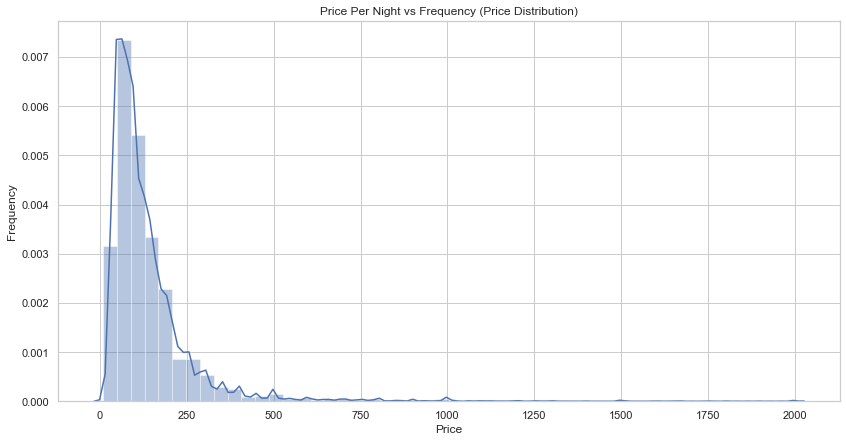

In [56]:
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Price Per Night vs Frequency (Price Distribution)');

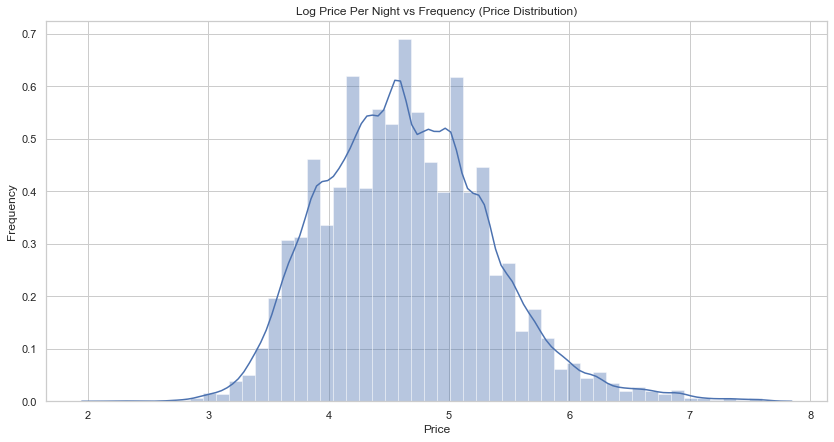

In [57]:
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.log_price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Log Price Per Night vs Frequency (Price Distribution)');


In [58]:
features = list(df.columns) 

In [59]:
features

['Unnamed: 0',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description_count',
 'host_since_year',
 'log_price',
 'dist_diff',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'manual_offline',
 'manual_online',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'sesame',
 'sesame_offline',
 'weibo',
 'work_email',
 'zhima_selfie',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Barbecue utensils',
 'Bathtu

In [60]:
features.remove('Unnamed: 0')
features.remove('price')
features.remove('log_price')

In [61]:
features

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description_count',
 'host_since_year',
 'dist_diff',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'manual_offline',
 'manual_online',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'sesame',
 'sesame_offline',
 'weibo',
 'work_email',
 'zhima_selfie',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Barbecue utensils',
 'Bathtub',
 'Beach essentials',
 'Beachfront',

In [62]:
df_features = df[features]

In [63]:
df_features

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",Baychester,Bayside,Bayswater,Bedford-Stuyvesant,Belle Harbor,Bellerose,Belmont,Bensonhurst,Bergen Beach,Boerum Hill,Borough Park,Breezy Point,Briarwood,...,Fieldston,Financial District,Flatbush,Flatiron District,Flatlands,Flushing,Fordham,Forest Hills,Fort Greene,Fort Hamilton,Fort Wadsworth,Fresh Meadows,Gerritsen Beach,Glendale,Gowanus,Gramercy,Graniteville,Grant City,Gravesend,Great Kills,Greenpoint,Greenwich Village,Grymes Hill,Harlem,Hell's Kitchen,Highbridge,Hollis,Holliswood,Howard Beach,Howland Hook,Huguenot,Hunts Point,Inwood,Jackson Heights,Jamaica,Jamaica Estates,Jamaica Hills,Kensington,Kew Gardens,Kew Gardens Hills,Kingsbridge,Kips Bay,Laurelton,Lighthouse Hill,Little Italy,Little Neck,Long Island City,Longwood,Lower East Side,Manhattan Beach,Marble Hill,Mariners Harbor,Maspeth,Melrose,Middle Village,Midland Beach,Midtown,Midwood,Mill Basin,Morningside Heights,Morris Heights,Morris Park,Morrisania,Mott Haven,Mount Eden,Mount Hope,Murray Hill,Navy Yard,Neponsit,New Brighton,New Dorp,New Dorp Beach,New Springville,NoHo,Nolita,North Riverdale,Norwood,Oakwood,Olinville,Ozone Park,Park Slope,Parkchester,Pelham Bay,Pelham Gardens,Port Morris,Port Richmond,Prince's Bay,Prospect Heights,Prospect-Lefferts Gardens,Queens Village,Randall Manor,Red Hook,Rego Park,Richmond Hill,Richmondtown,Ridgewood,Riverdale,Rockaway Beach,Roosevelt Island,Rosebank,Rosedale,Rossville,Schuylerville,Sea Gate,Sheepshead Bay,Shore Acres,Silver Lake,SoHo,Soundview,South Beach,South Ozone Park,South Slope,Springfield Gardens,Spuyten Duyvil,St. Albans,St. George,Stapleton,Stuyvesant Town,Sunnyside,Sunset Park,Theater District,Throgs Neck,Todt Hill,Tompkinsville,Tottenville,Tremont,Tribeca,Two Bridges,Unionport,University Heights,Upper East Side,Upper West Side,Van Nest,Vinegar Hill,Wakefield,Washington Heights,West Brighton,West Farms,West Village,Westchester Square,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,0,1,1,2,1.0,

In [71]:
target = df['price']

# Linear Model

In [91]:
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target)

#access output
#print(lm.intercept_)
#print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

R^2:  0.4069017138888551


In [92]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)

In [93]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [94]:
#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 106.25912472737107


In [95]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 114.32311416848253
Training:  106 vs. Testing:  114


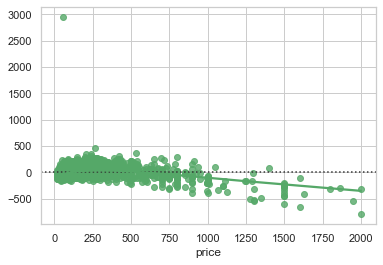

In [96]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g")

In [ ]:
#Residual Plot above shows that as the price gets higher it gets harder to predict, and our model tends to underestimate 

### Linear Model w/ Log Target Variable

In [86]:
y_log = np.log(y_train)
y_log

6861     4.605170
23278    4.605170
40337    4.248495
12117    3.555348
13811    4.564348
           ...   
5025     4.094345
42841    4.234107
22624    3.688879
501      4.934474
20861    4.382027
Name: price, Length: 37092, dtype: float64

In [90]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)
log_train_pred

array([4.79743184, 4.77705164, 3.93844499, ..., 4.51736058, 5.11501039,
       4.0571529 ])

In [87]:
#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)
y_train_pred

array([121.19875948, 118.75370431,  51.33870685, ...,  91.59352495,
       166.50251126,  57.80948695])

In [83]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 190.77992003012116


In [84]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))


print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 530061390809.216


In [85]:
y_test_pred = lm_log.predict(X_test)

#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 530061390809.216
Training:  190 vs. Testing:  530061390809


# Polynomial Model

In [18]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
poly_data = poly.fit_transform(df_features)

In [ ]:
poly_columns = poly.get_feature_names(df_features.columns)

In [39]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [40]:
df_poly.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",Baychester,Bayside,Bayswater,Bedford-Stuyvesant,Belle Harbor,Bellerose,Belmont,Bensonhurst,Bergen Beach,Boerum Hill,Borough Park,Breezy Point,Briarwood,...,Vinegar Hill West Brighton,Vinegar Hill West Farms,Vinegar Hill West Village,Vinegar Hill Westchester Square,Vinegar Hill Westerleigh,Vinegar Hill Whitestone,Vinegar Hill Williamsbridge,Vinegar Hill Williamsburg,Vinegar Hill Willowbrook,Vinegar Hill Windsor Terrace,Vinegar Hill Woodhaven,Vinegar Hill Woodlawn,Vinegar Hill Woodrow,Vinegar Hill Woodside,Wakefield^2,Wakefield Washington Heights,Wakefield West Brighton,Wakefield West Farms,Wakefield West Village,Wakefield Westchester Square,Wakefield Westerleigh,Wakefield Whitestone,Wakefield Williamsbridge,Wakefield Williamsburg,Wakefield Willowbrook,Wakefield Windsor Terrace,Wakefield Woodhaven,Wakefield Woodlawn,Wakefield Woodrow,Wakefield Woodside,Washington Heights^2,Washington Heights West Brighton,Washington Heights West Farms,Washington Heights West Village,Washington Heights Westchester Square,Washington Heights Westerleigh,Washington Heights Whitestone,Washington Heights Williamsbridge,Washington Heights Williamsburg,Washington Heights Willowbrook,Washington Heights Windsor Terrace,Washington Heights Woodhaven,Washington Heights Woodlawn,Washington Heights Woodrow,Washington Heights Woodside,West Brighton^2,West Brighton West Farms,West Brighton West Village,West Brighton Westchester Square,West Brighton Westerleigh,West Brighton Whitestone,West Brighton Williamsbridge,West Brighton Williamsburg,West Brighton Willowbrook,West Brighton Windsor Terrace,West Brighton Woodhaven,West Brighton Woodlawn,West Brighton Woodrow,West Brighton Woodside,West Farms^2,West Farms West Village,West Farms Westchester Square,West Farms Westerleigh,West Farms Whitestone,West Farms Williamsbridge,West Farms Williamsburg,West Farms Willowbrook,West Farms Windsor Terrace,West Farms Woodhaven,West Farms Woodlawn,West Farms Woodrow,West Farms Woodside,West Village^2,West Village Westches

In [41]:
df_poly.shape

(46366, 61424)

# Selecting Best Features for Linear Model 

### F Test

In [97]:
X_train.shape

(37092, 349)

In [98]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

/Users/alexzieky/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/alexzieky/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/alexzieky/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/alexzieky/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=20, score_func=<function f_regression at 0x7fcb6b224dd0>)

In [99]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [101]:
list(selected_columns)

['accommodates',
 'bedrooms',
 'beds',
 'Air conditioning',
 'Bathtub',
 'Cable TV',
 'Crib',
 'Dishwasher',
 'Dryer',
 'Elevator',
 'Gym',
 'Indoor fireplace',
 'Lock on bedroom door',
 'Pack ’n Play/travel crib',
 'Pool',
 'TV',
 'Washer',
 'hotel_room',
 'private_room',
 'Midtown']

In [102]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 113.49508274315664
Testing Root Mean Squared Error: 116.88906973552722


In [103]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  114.32311416848253 
 KBest:    116.88906973552722 



### Recursive Feature Elimination

In [104]:
from sklearn.feature_selection import RFECV

In [105]:
ols = linear_model.LinearRegression()

In [106]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

Fitting estimator with 349 features.
Fitting estimator with 348 features.
Fitting estimator with 347 features.
Fitting estimator with 346 features.
Fitting estimator with 345 features.
Fitting estimator with 344 features.
Fitting estimator with 343 features.
Fitting estimator with 342 features.
Fitting estimator with 341 features.
Fitting estimator with 340 features.
Fitting estimator with 339 features.
Fitting estimator with 338 features.
Fitting estimator with 337 features.
Fitting estimator with 336 features.
Fitting estimator with 335 features.
Fitting estimator with 334 features.
Fitting estimator with 333 features.
Fitting estimator with 332 features.
Fitting estimator with 331 features.
Fitting estimator with 330 features.
Fitting estimator with 329 features.
Fitting estimator with 328 features.
Fitting estimator with 327 features.
Fitting estimator with 326 features.
Fitting estimator with 325 features.
Fitting estimator with 324 features.
Fitting estimator with 323 features.
F

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=1)

In [107]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [109]:
list(selected_rfe)

['host_is_superhost',
 'accommodates',
 'bedrooms',
 'beds',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description_count',
 'host_since_year',
 'dist_diff',
 'email',
 'government_id',
 'identity_manual',
 'jumio',
 'manual_offline',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'work_email',
 'Baby monitor',
 'Babysitter recommendations',
 'Barbecue utensils',
 'Bathtub',
 'Bed linens',
 'Bread maker',
 'Breakfast',
 'Cable TV',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Crib',
 'Dishes and silverware',
 'Dishwasher',
 'Dryer',
 'EV charger',
 'Elevator',
 'Essentials',
 'Extra pillows and blankets',
 'Fire extinguisher',
 'First ai

In [110]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


Training Root Mean Squared Error: 106.43666967227406
Testing Root Mean Squared Error: 110.1598574009671


In [111]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  114.32311416848253 
 KBest:    116.88906973552722 
 RFE:      110.1598574009671


### Embredded Method: Lasso

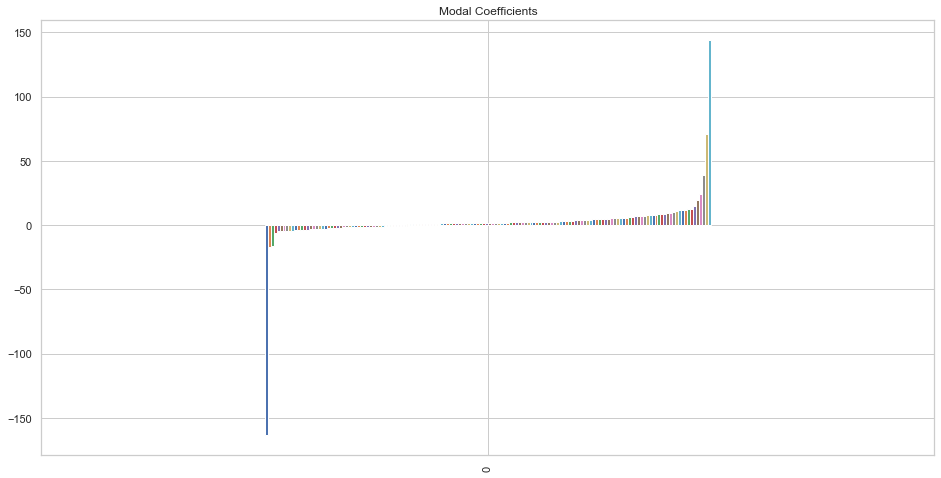

In [113]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [114]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_lasso01 = lasso.predict(X_train)
y_test_lasso01 = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_lasso01)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_test_lasso01))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


Training Error: 53.787178610131456
Testing Error: 110.14186836016326


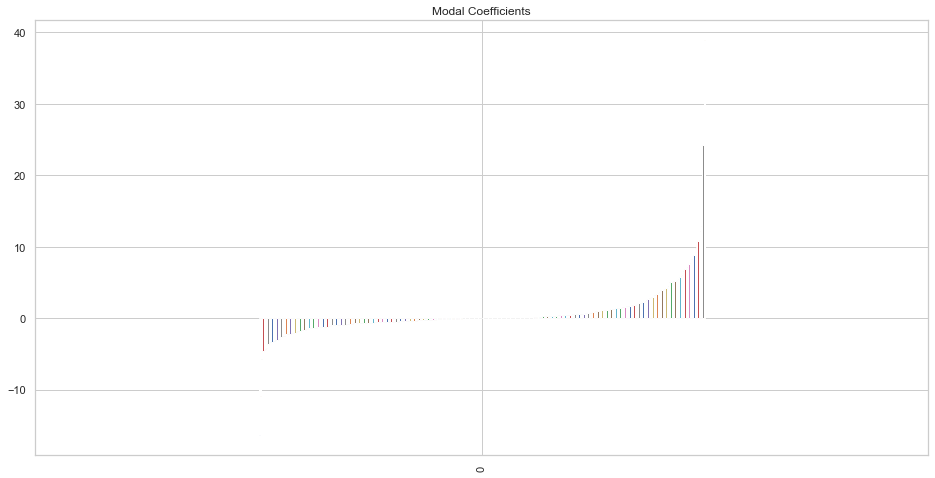

In [115]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [116]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

0    44
dtype: int64

In [117]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.1: \t",  test_rmse_lasso01, '\n')

Original: 	 114.32311416848253 
 KBest: 	 116.88906973552722 
 RFE: 	 	 110.1598574009671 
 Lasso 0.1: 	 110.14186836016326 

